In [ ]:
import torch.nn as nn
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

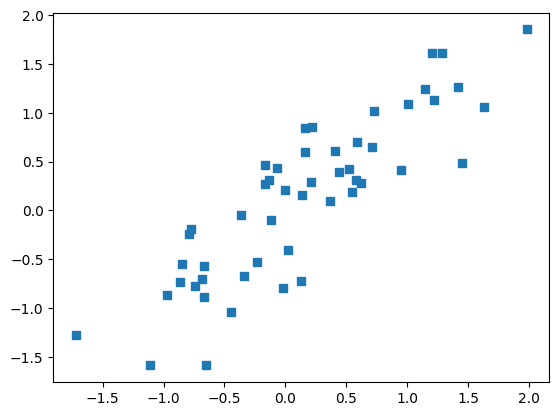

In [ ]:
N=50
X=torch.randn(N,1)
y=X+torch.randn(N,1)/2
plt.plot(X,y,'s')
plt.show()

In [ ]:
def NN(x,y):
  #model
  ANNreg=nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )
  #loss and optimizer function
  lossfn=nn.MSELoss()
  optimizer=torch.optim.SGD(ANNreg.parameters(),lr=0.5)

  #train the model
  num_epochs=500
  losses=torch.zeros(num_epochs)

  for epochi in range(num_epochs):
    # print(epochi) --0-499
    #forward pass
    yHat=ANNreg(X)

    #compute loss
    loss=lossfn(yHat,y)
    losses[epochi]=loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions=ANNreg(x)

  return predictions,losses

In [ ]:
def createData(m):
  x=torch.randn(50,1)
  y=m*x+torch.randn(50,1)/2
  return x,y

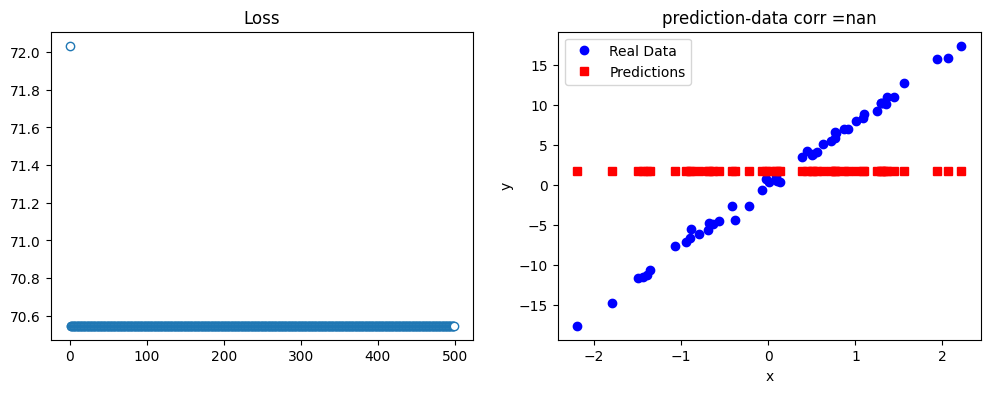

In [ ]:
#Test the model before training
x,y=createData(8)
yHat,losses=NN(x,y)
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_label('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real Data')
ax[1].plot(x,yHat.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr ={np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()

In [ ]:
slopes=np.linspace(-2,2,21)
numExps=50

#initialzie the output matrix
results=np.zeros((len(slopes),numExps,2))

for slopei  in range(len(slopes)):
  for N in range(numExps):

    #create a dataset and run the model
    x,y=createData(slopes[slopei])
    yHat,losses=NN(x,y)

    #store the final loss and performance
    results[slopei,N,0]=losses[-1]
    results[slopei,N,1]=np.corrcoef(y.T,yHat.detach().T)[0,1]

#co-relation can be found if the model didnot do well. Set nan's 0
results[np.isnan(results)]=0

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


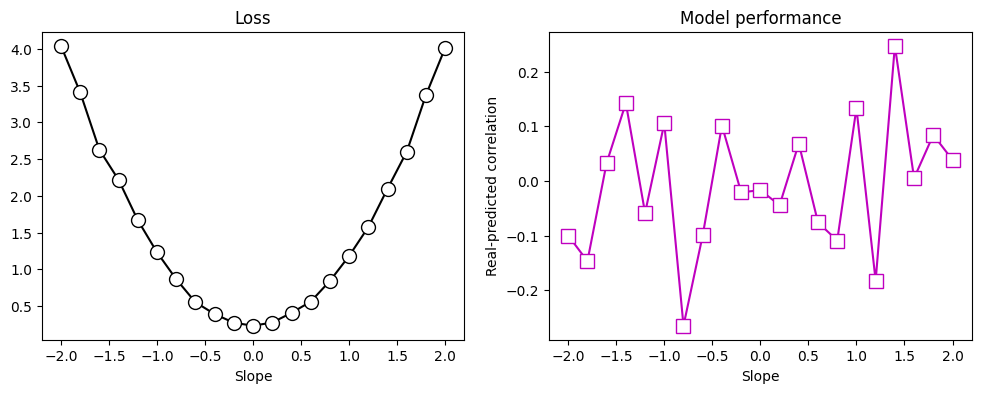

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')
plt.show()